Heart Disease dataset is about presence of a heart disease in the patient.

We will analyze the dataset to see how will we can predict if a patient has heart disease with input values provided to us.

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file
df=pd.read_csv("Heart Disease.csv")

In [3]:
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

Adding headers to the file

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
5,65,1,4,150,236,1,1,105,1,0,?,?,?,3
6,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
7,60,1,3,120,0,?,0,141,1,2,1,?,?,3
8,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1
9,56,1,2,126,166,0,1,140,0,0,?,?,?,0


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df['ca'].sum()

'???????????????????????????0??????????0????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????'

We can clearly remove the column Ca as it has value only in one cell and will not be useful in our predictions of heart disease.

In [8]:
df.drop('ca', inplace=True, axis=1)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,0


In [10]:
df.thal.sum()

'???????????3??????7?????6??7????????7???77??7????7?7??????7???????7???6???7???7???????????7????????6????67?????????????????????7?6???????6?7???????????????????????7?7???737????6????77?????3????3??6??'

We can also remove the column thal as it is very inconsistent and only 15% of the rows have a value for this column and will not be useful in our predictions.

In [11]:
df.drop('thal', inplace=True, axis=1)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,44,1,4,130,209,0,1,127,0,0,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,2
2,55,1,4,142,228,0,1,149,1,2.5,1,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0


In [13]:
df.mean()

age        59.331658
sex         0.969849
cp          3.502513
restecg     0.733668
target      1.517588
dtype: float64

In [14]:
#Lets find the mean and median of the data by removing the rows with ? values
mean_df = df[(df != '?').all(axis=1)]
mean_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
1,60,1,4,132,218,0,1,140,1,1.5,3,2
2,55,1,4,142,228,0,1,149,1,2.5,1,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0
6,60,1,3,180,0,0,1,140,1,1.5,2,0
8,60,1,2,160,267,1,1,157,0,0.5,2,1
10,59,1,4,140,0,0,1,117,1,1,2,1
11,62,1,4,110,0,0,0,120,1,0.5,2,1
13,57,1,4,128,0,1,1,148,1,1,2,1
15,63,1,4,170,177,0,0,84,1,2.5,3,4


In [15]:
mean=mean_df.mean()
mean

age          5.984884e+01
sex          9.651163e-01
cp           3.697674e+00
trestbps    1.536536e+252
chol        2.537537e+209
fbs          1.163955e+81
restecg      6.279070e-01
thalach     1.629651e+247
exang        1.290815e+83
slope        3.629328e+83
target       1.697674e+00
dtype: float64

In [16]:
median=mean_df.median()
median

age          60.0
sex           1.0
cp            4.0
trestbps    130.0
chol        217.5
fbs           0.0
restecg       1.0
thalach     123.0
exang         1.0
oldpeak       1.5
slope         2.0
target        2.0
dtype: float64

In [17]:
mean_df.describe()

,age,sex,cp,restecg,target
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,59.848837,0.965116,3.697674,0.627907,1.697674
std,7.521760,0.184561,0.704102,0.686792,1.178930
min,37.000000,0.000000,1.000000,0.000000,0.000000
25%,56.000000,1.000000,4.000000,0.000000,1.000000
50%,60.000000,1.000000,4.000000,1.000000,2.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


Now we have the mean and median of the data. Lets replace the ? values in the columns using mean and median to replace the same in each column

In [18]:
df['trestbps'].replace('?',int('130'),inplace=True)

In [19]:
df['chol'].replace('?',float('217.5'),inplace=True)

In [20]:
df['chol'].replace('0',float('217.5'),inplace=True)

In [21]:
df['fbs'].replace('?',int('0'),inplace=True)

In [22]:
df['restecg'].replace('?',int('1'),inplace=True)

In [23]:
df['thalach'].replace('?',int('123'),inplace=True)

In [24]:
df['exang'].replace('?',int('1'),inplace=True)

In [25]:
df['oldpeak'].replace('?',float('1.5'),inplace=True)

In [26]:
df['slope'].replace('?',float('2'),inplace=True)

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,44,1,4,130,209,0,1,127,0,0,2,0
1,60,1,4,132,218,0,1,140,1,1.5,3,2
2,55,1,4,142,228,0,1,149,1,2.5,1,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0
4,66,1,3,120,217.5,0,1,120,0,-0.5,1,0
5,65,1,4,150,236,1,1,105,1,0,2,3
6,60,1,3,180,217.5,0,1,140,1,1.5,2,0
7,60,1,3,120,217.5,0,0,141,1,2,1,3
8,60,1,2,160,267,1,1,157,0,0.5,2,1
9,56,1,2,126,166,0,1,140,0,0,2,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
age         199 non-null int64
sex         199 non-null int64
cp          199 non-null int64
trestbps    199 non-null object
chol        199 non-null object
fbs         199 non-null object
restecg     199 non-null int64
thalach     199 non-null object
exang       199 non-null object
oldpeak     199 non-null object
slope       199 non-null object
target      199 non-null int64
dtypes: int64(5), object(7)
memory usage: 18.7+ KB


In [29]:
df["trestbps"] = df.trestbps.astype(float)
df["chol"] = df.chol.astype(float)
df["fbs"] = df.fbs.astype(float)
df["thalach"] = df.thalach.astype(float)
df["exang"] = df.exang.astype(float)
df["oldpeak"] = df.oldpeak.astype(float)
df["slope"] = df.slope.astype(float)

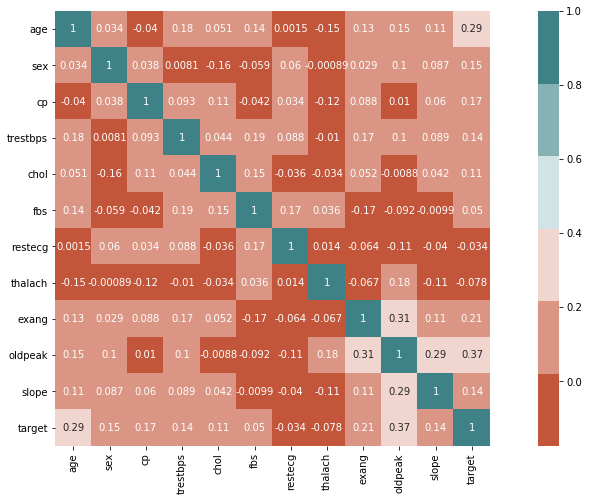

In [30]:
#Finding Correlation
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),square=True,annot=True,cmap=sns.diverging_palette(20,200))
plt.show()

From the correlation heatmap, we can see that the restecg,thalach and fbs are less correlated and can be removed from our data whcih is to be used in prediction models for our target variable.

We can also see that oldpeak, age and exang have high correlation with target column.

Distribution of Target with age

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

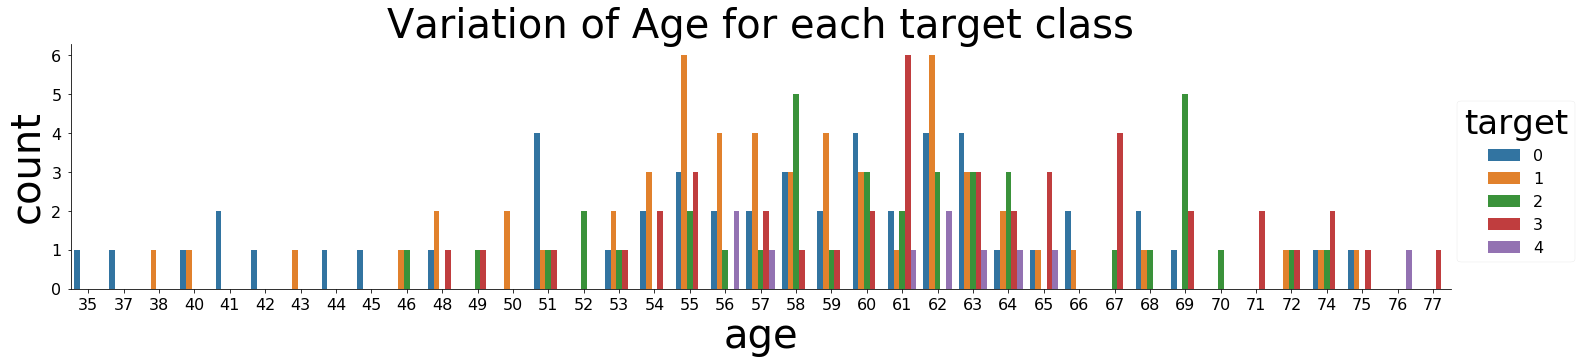

In [32]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 40,"axes.labelsize": 40}) 
sns.factorplot(kind = 'count', data = df, x = 'age',size=5,aspect=4, hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

Lets apply ML algorithms now

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X= df.drop(['restecg','thalach','fbs','target'],axis=1)
Y=df['target']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(159, 8)
(40, 8)


In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [37]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 23.875
Naive Bayes: 12.541666666666668
K-Nearest Neighbour: 23.291666666666664
Decision Tree: 26.291666666666668
Support Vector Machine-linear: 36.416666666666664
Support Vector Machine-rbf: 17.0
Random Forest: 32.083333333333336
MLP: 27.125
AdaBoostClassifier: 29.458333333333332
GradientBoostingClassifier: 30.083333333333336


Support vector machine-linear is producing the best results out of all the models. Lets hypertune our model using Grid Search CV

In [38]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train) 
print(f"best parameters: {grid.best_params_}")
print(f"best score: {grid.score(X_test,Y_test)}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2545454545454545, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2692307692307692, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2692307692307692, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.2545454545454545, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.2692307692307692, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.2692307692307692, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.2692307692307692, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.21153846153846154, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.34545454545454546, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.36538461538461536, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ......... C=1, gamma=0.001, kernel=rbf, score=0.25, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ......... C=1, gamma=0.0001, kernel=rbf, score=0.2, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.3269230769230769, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...............

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished


In [39]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [40]:
grid_predictions = grid.predict(X_test) 

In [41]:
# print classification report 
print((grid_predictions)) 

[2 1 0 0 1 0 3 3 1 0 3 0 0 3 3 0 0 0 0 2 0 0 1 1 0 0 0 3 0 2 0 1 3 3 2 3 2
 1 0 3]


In [42]:
grid.score(X_test,Y_test)

0.25

The score has reduced. Lets try the next best model, random forest with hypertuned paramaeters.

In [43]:
m = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
m.fit(X_train,Y_train)
m.score(X_train,Y_train)

0.8553459119496856

Checking the model on test data

In [44]:
m = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
m.fit(X_test,Y_test)
m.score(X_test,Y_test)

0.825

In [45]:
#Saving the best model for future use
from sklearn.externals import joblib
joblib.dump(m,'HeartDisease.obj')

['HeartDisease.obj']